# World University Ranking: Clustering and Multivariate Analysis

The dataset is from: https://www.kaggle.com/datasets/raymondtoo/the-world-university-rankings-2016-2024.
### The provided description:
There are thousands (if not hundreds of thousands) of institutions of higher learning around the world that admit new students every year. Prospective students are therefore usually tasked with researching the best institutions that suit their learning preferences before making their application. The easiest way is usually to see how a university of interest ranks globally (or in its native country) and then comparing it with another university. A more detailed approach would be to compare universities not on their rankings alone but also on metrics such as research environment, teaching standards, hospitability to foreign students, and industry income among others.
To that end, this dataset provides a list of universities together with their rankings and various other metrics of interest according to the Times Higher Education.

### The target of this analysis

Using this data, a number of multivariate plots will be created. The following questions will be answered:

- #### Which continent has the best universities (depending on the variables)?
- #### How do nations differ between each other?
- #### How do top universities differ from other ones?
- #### Can clusters create meaningful groupings based on this data?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
import country_converter as coco
import pycountry_convert as pc
from geopy.geocoders import Nominatim
import plotly.express as px
import geopandas as gpd
%matplotlib inline
import requests
from io import BytesIO

In [2]:
path = "/files/"
univ = pd.read_csv(path+'THE_uni_ranking.csv',sep=",", encoding='utf-8', encoding_errors='ignore')
print(univ.head())

   Rank                                   Name         Country  \
0   1.0     California Institute of Technology   United States   
1   2.0                   University of Oxford  United Kingdom   
2   3.0                    Stanford University   United States   
3   4.0                University of Cambridge  United Kingdom   
4   5.0  Massachusetts Institute of Technology   United States   

   Student Population  Students to Staff Ratio International Students  \
0                2243                      6.9                    26%   
1               19920                     11.6                    34%   
2               15596                      7.8                    22%   
3               18810                     11.8                    34%   
4               11074                      9.0                    33%   

  Female to Male Ratio  Overall Score  Teaching  Research Environment  \
0              33 : 67           95.2      95.6                  97.6   
1             46:5

In [3]:
# Shape of dataframe
univ.shape

(12430, 14)

In [4]:
#Check dtypes of each column
univ.dtypes

Rank                       float64
Name                        object
Country                     object
Student Population           int64
Students to Staff Ratio    float64
International Students      object
Female to Male Ratio        object
Overall Score              float64
Teaching                   float64
Research Environment       float64
Research Quality           float64
Industry Impact            float64
International Outlook      float64
Year                         int64
dtype: object

We need to turn Rank into an integer

In [5]:
univ = univ.astype({"Rank": int})
# Check if it worked
print(univ.dtypes)

print("\nNumber of unique ranks in dataset: \n",univ["Rank"].nunique())

Rank                         int64
Name                        object
Country                     object
Student Population           int64
Students to Staff Ratio    float64
International Students      object
Female to Male Ratio        object
Overall Score              float64
Teaching                   float64
Research Environment       float64
Research Quality           float64
Industry Impact            float64
International Outlook      float64
Year                         int64
dtype: object

Number of unique ranks in dataset: 
 1904


### Add the continents for each country

In [6]:
# KeyError: "Invalid Country Name: 'Kosovo'"
# Drop Kosovo
univ = univ[univ['Country'] != 'Kosovo']
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

country_name = list(univ['Country'])
univ["Continent"] = univ["Country"].apply(lambda x: country_to_continent(x))

/opt/conda/lib/python3.8/site-packages/pycountry/db.py:51: UserWarning: Country's official_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)
/opt/conda/lib/python3.8/site-packages/pycountry/db.py:51: UserWarning: Country's common_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)


In [7]:
# It worked!
print(univ.head())

   Rank                                   Name         Country  \
0     1     California Institute of Technology   United States   
1     2                   University of Oxford  United Kingdom   
2     3                    Stanford University   United States   
3     4                University of Cambridge  United Kingdom   
4     5  Massachusetts Institute of Technology   United States   

   Student Population  Students to Staff Ratio International Students  \
0                2243                      6.9                    26%   
1               19920                     11.6                    34%   
2               15596                      7.8                    22%   
3               18810                     11.8                    34%   
4               11074                      9.0                    33%   

  Female to Male Ratio  Overall Score  Teaching  Research Environment  \
0              33 : 67           95.2      95.6                  97.6   
1             46:5

## Overview of the data using histograms

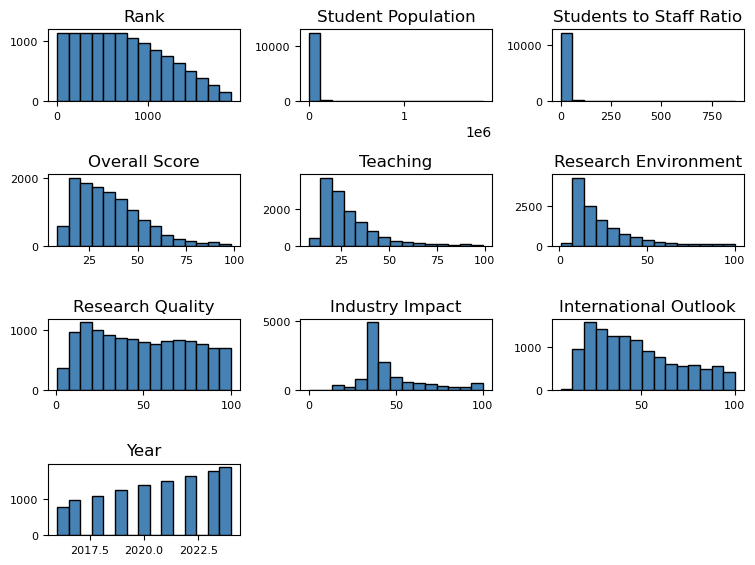

In [8]:
univ.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   

Make list of useful variables to analyse them

In [9]:
univ.columns

Index(['Rank', 'Name', 'Country', 'Student Population',
       'Students to Staff Ratio', 'International Students',
       'Female to Male Ratio', 'Overall Score', 'Teaching',
       'Research Environment', 'Research Quality', 'Industry Impact',
       'International Outlook', 'Year', 'Continent'],
      dtype='object')

In [10]:
variables = ['Country', 'Student Population',
       'Students to Staff Ratio', 'International Students',
       'Female to Male Ratio', 'Overall Score', 'Teaching',
       'Research Environment', 'Research Quality', 'Industry Impact',
       'International Outlook', 'Year']
univ_desc = round(univ[variables].describe(),2)
print(univ_desc)

       Student Population  Students to Staff Ratio  Overall Score  Teaching  \
count            12429.00                 12429.00       12429.00  12429.00   
mean             23366.59                    18.90          35.33     28.54   
std              34988.53                    17.06          16.88     14.06   
min                 25.00                     0.30           8.22      8.20   
25%              10148.00                    12.30          21.74     18.80   
50%              17823.00                    16.30          32.40     24.30   
75%              29220.00                    22.00          45.19     33.80   
max            1824383.00                   865.80          98.46     99.00   

       Research Environment  Research Quality  Industry Impact  \
count              12429.00          12429.00         12429.00   
mean                  24.11             49.19            46.51   
std                   17.60             27.53            18.69   
min                    0

#### The mean university has 23367 students with a Student to Staff Ratio of 18.90.

## Which continent has the best universities (depending on the variables)? 

In [12]:
# Average score 
#
average_score_by_country = univ.groupby('Continent')['Overall Score'].sum().sort_values(ascending=False)
print("\nOverall Score by Continent")
print(average_score_by_country)

# total students 
total_students_by_country = univ.groupby('Continent')['Student Population'].sum().sort_values(ascending=False)
print("\nStudent Population by Continent")
print(total_students_by_country)


Overall Score by Continent
Continent
Europe           175594.177783
Asia             125840.616857
North America     90352.285727
Oceania           18787.264000
South America     14967.600636
Africa            13633.038136
Name: Overall Score, dtype: float64

Student Population by Continent
Continent
Asia             92468700
Europe           89693109
North America    50703109
Africa           30575758
South America    18253872
Oceania           8728737
Name: Student Population, dtype: int64


### Most international students come from Europe or Asia. Their numbers incresed during the years from 2016 to 2024.

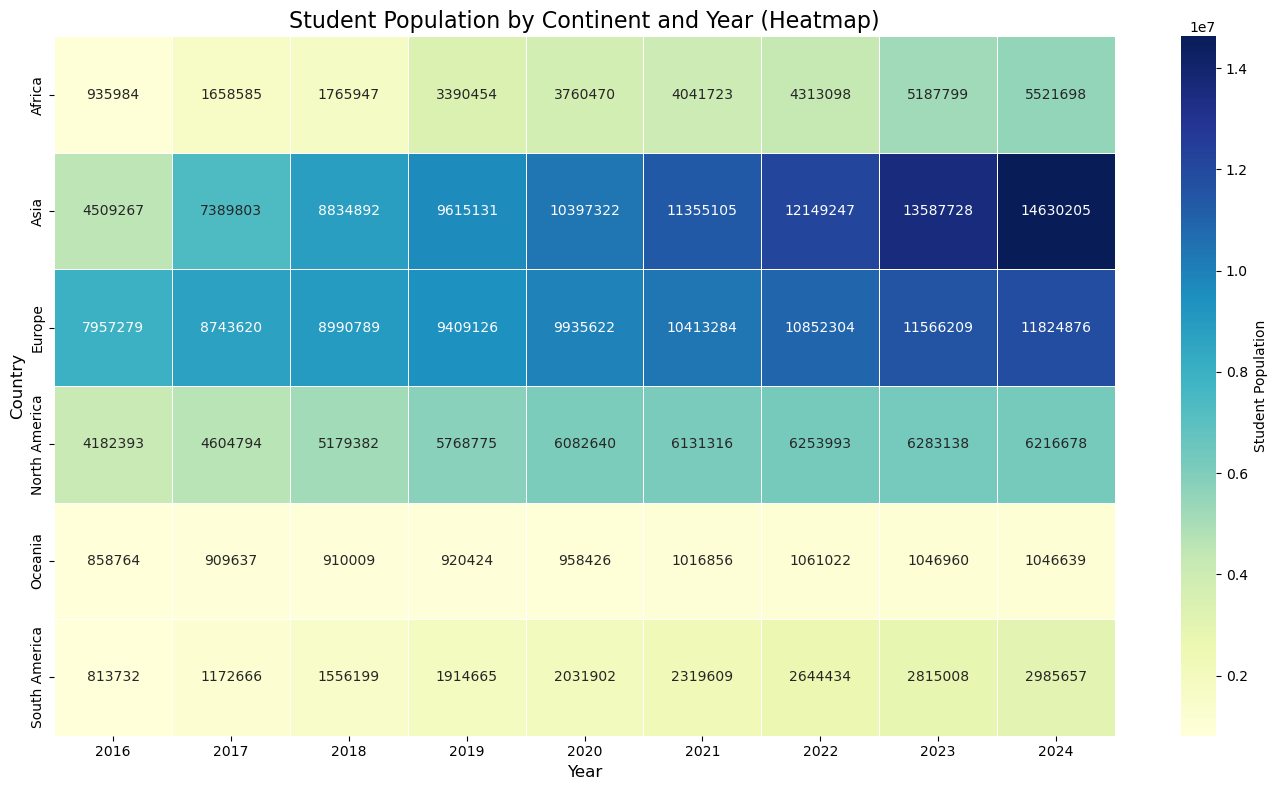

In [13]:
# Using Country is not feasible as there are too myn countries in the dataset
total_students_by_country = univ.groupby(['Continent', 'Year'])['Student Population'].sum().sort_values(ascending=False)
# Unstack the DataFrame to make it suitable for plotting
heatmap_data = total_students_by_country.unstack()

# Plotting the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=.5, annot=True, fmt=".0f", cbar_kws={'label': 'Student Population'})

# Add title and labels
plt.title('Student Population by Continent and Year (Heatmap)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Country', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

### North America is leading when it comes to teaching and research. Europe and Oceania are in the middle, while Africa and South America are lagging.

In [14]:
# average teaching
average_teaching_by_country = univ.groupby('Continent')['Teaching'].mean().sort_values(ascending=False)
average_research_by_country = univ.groupby('Continent')['Research Environment'].mean().sort_values(ascending=False)
print("Average Teaching Score by Country:\n", average_teaching_by_country)
print("\nAverage Research Score by Country:\n", average_research_by_country)

Average Teaching Score by Country:
 Continent
North America    38.701773
Oceania          28.947328
Europe           28.855757
Asia             25.961284
South America    20.929471
Africa           19.829845
Name: Teaching, dtype: float64

Average Research Score by Country:
 Continent
North America    34.594578
Oceania          33.740967
Europe           26.209635
Asia             19.504774
Africa           13.263760
South America    13.179542
Name: Research Environment, dtype: float64


### Female Students dominate in Oceania, Africa and Europe. Genders are more equally distributed in North America, South America and Asia.

In [15]:
# female to male ratio
average_female_to_male_ratio_by_country = univ.groupby('Continent')['Female to Male Ratio'].apply(lambda x: x.mode().iloc[0])
print(average_female_to_male_ratio_by_country)

Continent
Africa           54:46:00
Asia             50:50:00
Europe           56:44:00
North America    52:48:00
Oceania          57:43:00
South America    51:49:00
Name: Female to Male Ratio, dtype: object


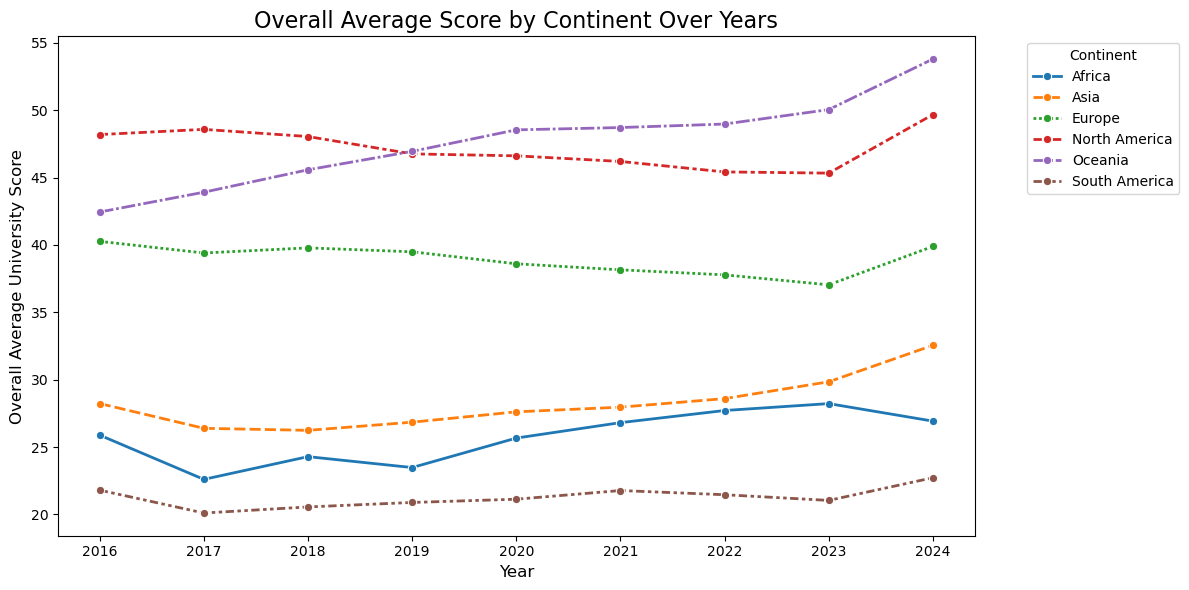

In [16]:
# score trend
overall_score_trend = univ.groupby(['Continent', 'Year'])['Overall Score'].mean()
#print("Overall Average Score by Continent:\n", overall_score_trend)
plot_data = overall_score_trend.unstack(level='Continent')

# Plotting the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=plot_data, marker='o', palette='tab10', linewidth=2)

# Add title and labels
plt.title('Overall Average Score by Continent Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Overall Average University Score', fontsize=12)

# Show the legend
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

### The best universities are in North America, Oceania and then Europe. North America is especially strong in research and teaching. Asia catches up slowly.

### Nations of the top universities are getting more diverse while the USA, Japan and the UK stay on top

In [18]:
# Create new column for ISO3 Country Codes
univ["ISO3"] = coco.convert(names=univ["Country"], to='ISO3')
# Check if it worked: Yes!

In [125]:
# Create an empty DataFrame to store the results
count_year = pd.DataFrame(columns=['Country', 'Year', 'Value_Count', 'Continent'])

for year, group in univ.groupby('Year'):
    country_counts = group['Country'].value_counts().reset_index()
    country_counts.columns = ['Country', 'Value_Count']
    country_counts['Year'] = year
    count_year = pd.concat([count_year, country_counts], ignore_index=True)

count_year['Value_Count'] = pd.to_numeric(count_year['Value_Count'], errors='coerce')

In [128]:
# Assuming 'univ' is your DataFrame with the 'Continent' column

# Create an empty DataFrame to store the results
count_year = pd.DataFrame(columns=['Country', 'Year', 'Value_Count', 'Continent'])

for year, group in univ.groupby('Year'):
    country_counts = group[['Country', 'Continent']].value_counts().reset_index()
    country_counts.columns = ['Country', 'Continent', 'Value_Count']
    country_counts['Year'] = year
    count_year = pd.concat([count_year, country_counts], ignore_index=True)

count_year['Value_Count'] = pd.to_numeric(count_year['Value_Count'], errors='coerce')


In [129]:
count_year

,Country,Year,Value_Count,Continent
0,United States,2016,147,North America
1,United Kingdom,2016,78,Europe
2,Japan,2016,41,Asia
3,Germany,2016,37,Europe
4,China,2016,37,Asia
...,...,...,...,...
807,Puerto Rico,2024,1,North America
808,Qatar,2024,1,Asia
809,Jamaica,2024,1,North America
810,Malta,2024,1,Europe


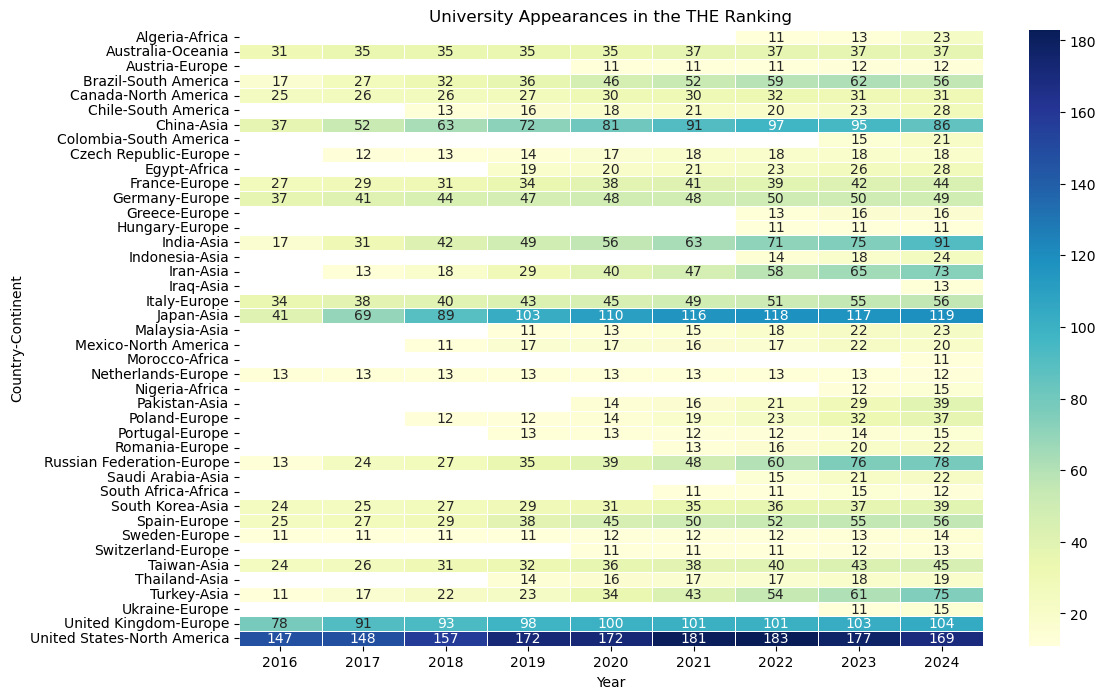

In [131]:
# Filter countries with value counts over 20
filtered_count_year = count_year[count_year['Value_Count'] > 10]
# Sort by 'Value_Count' in descending order
filtered_count_year = filtered_count_year.sort_values(by='Value_Count', ascending=False)
# Pivot the DataFrame to have 'Country' and 'Year' as indices
heatmap_data = filtered_count_year.pivot(index=['Country'], columns='Year', values='Value_Count')
# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g', linewidths=.5)
plt.title('University Appearances in the THE Ranking')
plt.show()


In [52]:
# Sort the DataFrame by Overall_Score and get the top 10 universities for each year
top_100_universities = univ.sort_values(by='Overall Score', ascending=False).groupby('Year').head(100)

In [54]:
top_100_universities["Country"].value_counts()

Country
United States         348
United Kingdom        105
Germany                74
Netherlands            64
Australia              55
Canada                 38
China                  38
Hong Kong              31
Switzerland            29
France                 22
Sweden                 19
South Korea            19
Japan                  18
Singapore              18
Belgium                10
Finland                 6
Denmark                 4
Russian Federation      1
Taiwan                  1
Name: count, dtype: int64

In [20]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

/tmp/ipykernel_368/3926210268.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


### American and british dominance: The Top 10 is populated by the usual suspects and shows little variation. 

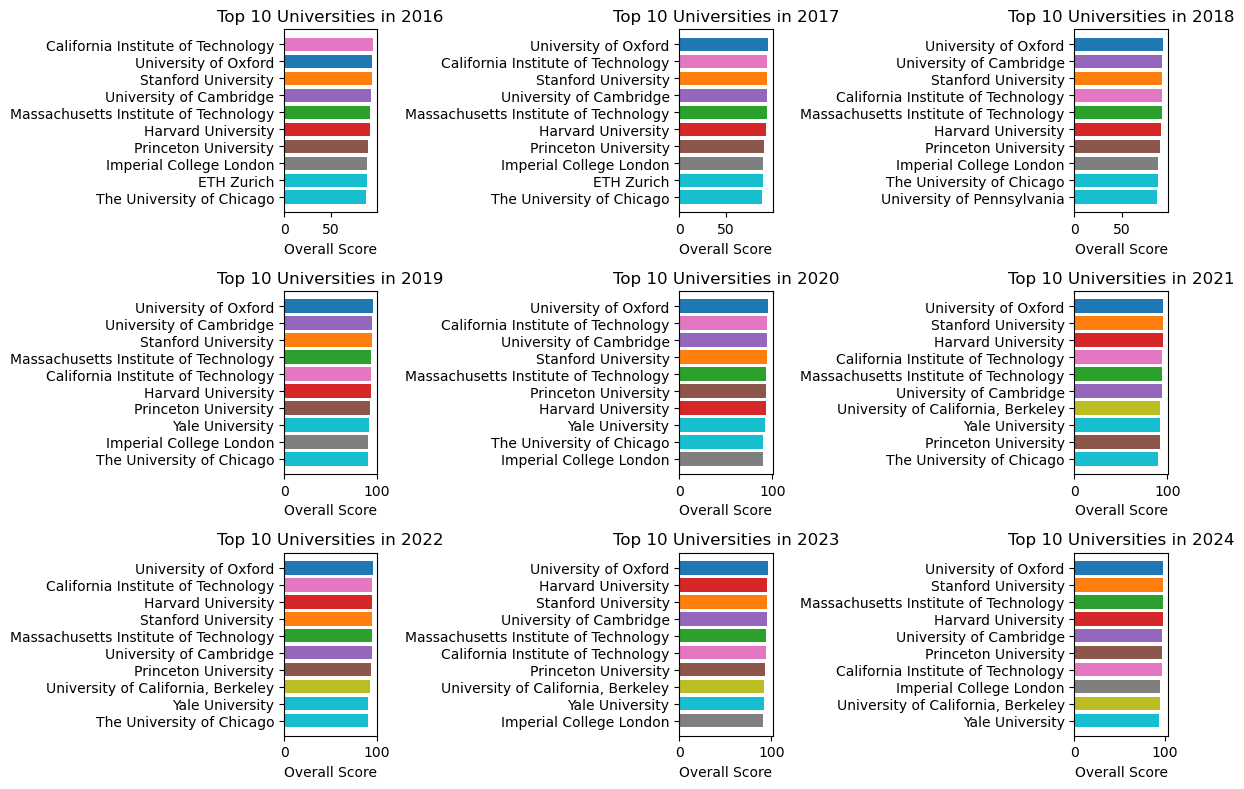

In [47]:
# Sort the DataFrame by Overall_Score and get the top 10 universities for each year
top_10_universities = univ.sort_values(by='Overall Score', ascending=False).groupby('Year').head(10)

# Plotting
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
# Create a dictionary to map each university to a color
unique_universities = top_10_universities['Name'].unique()
color_mapping = {univ: plt.cm.tab10(i) for i, univ in enumerate(unique_universities)}

for (year, group), ax in zip(top_10_universities.groupby('Year'), axes.flatten()):
    colors = [color_mapping[univ] for univ in group['Name']]
    ax.barh(group['Name'], group['Overall Score'], color=colors)
    ax.set_title(f'Top 10 Universities in {year}')
    ax.set_xlabel('Overall Score')
    ax.invert_yaxis()  # Higher score at the top

plt.tight_layout()
plt.show()

In [29]:
# Sort the filtered data by 'Science_score' in descending order
univ = univ.sort_values('Overall Score', ascending=False)
# Calculate the average for each column over the years
average_over_years = univ.groupby(['Rank', 'Student Population', 'Overall Score']).mean().reset_index()

# Load a world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a plot
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot all countries from the world dataset
world.plot(ax=ax, color='lightgrey')

# Plot countries with data and merge them with the map
merged = world.merge(average_over_years, how='left', left_on='iso_a3', right_on='ISO3')
merged.plot(column='Overall Score', ax=ax, legend=True, legend_kwds={'label': "Overall Score", 'orientation': "horizontal"})

plt.title('Overall Scores for Nations')
plt.show()

TypeError: Could not convert California Institute of Technology to numeric

In [ ]:
filter_uni = univ_filtered.copy()
filter_uni.columns
# List of column names to be dropped
columns_to_drop = ['Name', 'Continent', 'Country', 'Rank', 'Female to Male Ratio']
# Use the drop method to remove the specified columns
filter_uni = filter_uni.drop(columns=columns_to_drop)
# Remove '%' from the 'International Students' column
filter_uni['International Students'] = filter_uni['International Students'].str.replace('%', '')
# Convert the column to numeric if needed
filter_uni['International Students'] = pd.to_numeric(filter_uni['International Students'], errors='coerce')


In [ ]:
filter_uni.dtypes

In [ ]:
float_columns = filter_uni.select_dtypes(include=['float64']).columns

In [ ]:
# List of columns you want to convert to integers
float_columns = filter_uni.select_dtypes(include=['float64']).columns
# Replace or drop non-finite values
filter_uni[float_columns] = filter_uni[float_columns].replace([np.inf, -np.inf], np.nan).fillna(0).astype(int)

In [ ]:
# Round float columns
# Select only the float columns
float_columns = filter_uni.select_dtypes(include=['float64']).columns
# Round the float columns by turning them to int
# Convert float columns to integers
filter_uni[float_columns] = filter_uni[float_columns].astype(int)

In [ ]:
# Get Averages for each Country and Year
# Group by 'Country' and 'Year' and calculate the mean for each group
averages_df = filter_uni.groupby(['ISO3', 'Year']).mean().reset_index()
# Round the float columns by turning them to int
# Convert float columns to integers
float_columns_avg = averages_df.select_dtypes(include=['float64']).columns
averages_df[float_columns_avg] = averages_df[float_columns_avg].astype(int)

In [ ]:
# Create an animated choropleth map
fig = px.choropleth(
    averages_df,
    locations='ISO3',  # ISO3 country codes
    color='Overall Score',
    hover_name='Research Quality',
    animation_frame='Year',
    title='Average Science Scores per Nations Over Time',
    color_continuous_scale='viridis',
    projection='natural earth'
)

fig.show()

### The best countries are the USA, Canada, Australia, Germany, France, Sweden, Finaland with China catching up. As will be shown, these countries also have the highest average student population.

In [ ]:
# Load a world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a plot
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot all countries from the world dataset
world.plot(ax=ax, color='lightgrey')
# Plot countries with data and merge them with the map
merged_average = world.merge(averages_df, how='left', left_on='iso_a3', right_on='ISO3')
merged_average.plot(column='Overall Score', ax=ax, legend=True, legend_kwds={'label': "Overall Score", 'orientation': "horizontal"})

plt.title('Average Student Population per Nation')
plt.show()

## How do top universities differ from other ones?

In [ ]:
univ_top = univ[univ['Rank'] <= 50]
univ_rest = univ[univ['Rank'] >= 50]

In [ ]:
univ_top['Country'].value_counts()

In [ ]:
average_top = univ_top.groupby('Continent')['Overall Score'].mean().sort_values(ascending=False)
average_rest = univ_rest.groupby('Continent')['Overall Score'].mean().sort_values(ascending=False)

In [ ]:
# Step 4: Add Slider for Years
fig = px.choropleth(
    world,
    locations='Country',
    locationmode='country names',
    color='UniversityCount',
    hover_name='Country',
    animation_frame='Year',
    title='University Counts by Country',
    color_continuous_scale=px.colors.sequential.Plasma,
)

fig.update_geos(projection_type="natural earth")

# Show the figure
fig.show()